In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import networkx as nx
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from collections import Counter

# Load the dataset
df = pd.read_csv('metadata.csv')


In [3]:
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45769,4360s2yu,289deae0b2050aa259a05ba84565a4df82fa099a,Elsevier,Personal Protective Equipment: Protecting Heal...,10.1016/j.clinthera.2015.07.007,PMC4661082,26452427.0,els-covid,Abstract Purpose The recent Ebola epidemic tha...,2015-11-01,"Fischer, William A.; Weber, David J.; Wohl, Da...",Clinical Therapeutics,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.clinthera.2015.07.007
45770,66jumbir,21a4369f83891bf6975dd916c0aa495d5df8709e,Elsevier,Viruses and asthma,10.1016/j.bbagen.2011.01.012,PMC3130828,21291960.0,els-covid,Abstract Background Viral respiratory infectio...,2011-11-30,"Dulek, Daniel E.; Peebles, R. Stokes",Biochimica et Biophysica Acta (BBA) - General ...,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.bbagen.2011.01.012
45771,3wk36h9p,NaN,Elsevier,Why the WHO won't use the p-word,10.1016/s0262-4079(20)30474-7,NaN,NaN,els-covid,"There are no criteria for a pandemic, but covi...",2020-03-07,"MacKenzie, Debora",New Scientist,NaN,#5716,False,custom_license,https://doi.org/10.1016/s0262-4079(20)30474-7
45772,0ujw0gak,NaN,WHO,"Communication, transparency key as Canada face...",10.1503/cmaj.1095846,PMC7030882,32071113.0,unk,NaN,2020-02-17,"Glauser, Wendy",Canadian Medical Association Journal,1.953688e+09,#4117,False,NaN,https://doi.org/10.1503/cmaj.1095846


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\44788\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44788\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


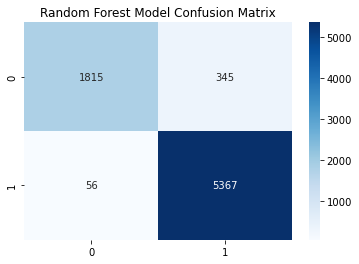

Random Forest Model Accuracy: 0.9471185546617433
Random Forest Model Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      2160
           1       0.94      0.99      0.96      5423

    accuracy                           0.95      7583
   macro avg       0.95      0.91      0.93      7583
weighted avg       0.95      0.95      0.95      7583



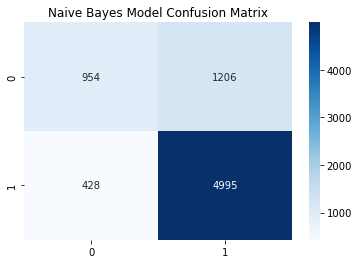

Naive Bayes Model Accuracy: 0.7845180007912436
Naive Bayes Model Report:
               precision    recall  f1-score   support

           0       0.69      0.44      0.54      2160
           1       0.81      0.92      0.86      5423

    accuracy                           0.78      7583
   macro avg       0.75      0.68      0.70      7583
weighted avg       0.77      0.78      0.77      7583



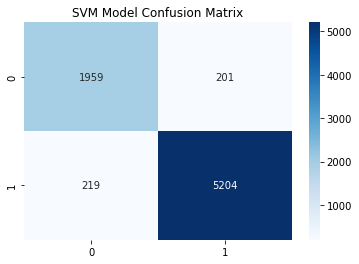

SVM Model Accuracy: 0.9446129500197811
SVM Model Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2160
           1       0.96      0.96      0.96      5423

    accuracy                           0.94      7583
   macro avg       0.93      0.93      0.93      7583
weighted avg       0.94      0.94      0.94      7583



In [4]:
# answers the 1 reesearch question
df.dropna(subset=["abstract"], inplace=True)


# Define the target variable for classification 
relevant_keywords = ["biomedical", "research", "medicine", "disease", "disorder", "condition", "syndrome", "illness", "infection"]
df["target"] = df["abstract"].apply(lambda x: 1 if any(keyword in x.lower() for keyword in relevant_keywords) else 0)

# Text preprocessing and feature extraction
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words)

df["processed_abstract"] = df["abstract"].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["processed_abstract"], df["target"], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Generate a confusion matrix and plot the heatmap for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(data=cm_rf, annot=True, fmt=".0f", cmap="Blues")
plt.title("Random Forest Model Confusion Matrix")
plt.show()

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Model Report:\n", report_rf)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Generate a confusion matrix and plot the heatmap for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(data=cm_nb, annot=True, fmt=".0f", cmap="Blues")
plt.title("Naive Bayes Model Confusion Matrix")
plt.show()

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Model Accuracy:", accuracy_nb)

report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Model Report:\n", report_nb)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Generate a confusion matrix and plot the heatmap for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(data=cm_svm, annot=True, fmt=".0f", cmap="Blues")
plt.title("SVM Model Confusion Matrix")
plt.show()

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", accuracy_svm)

report_svm = classification_report(y_test, y_pred_svm)
print("SVM Model Report:\n", report_svm)

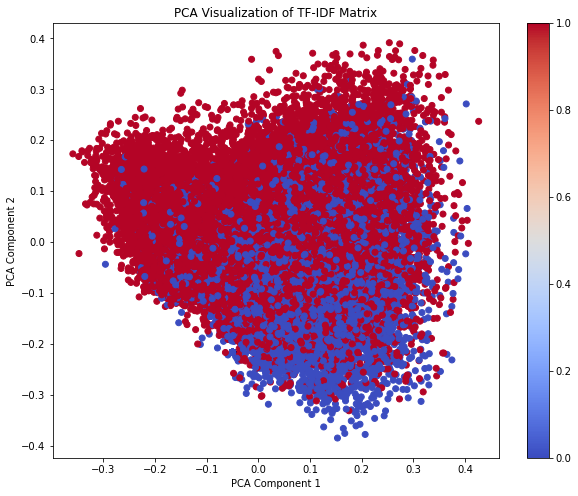

In [5]:
# Perform PCA on the TF-IDF matrix
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
# The resulting X_train_pca holds the 2D representation of the original data. 
# It is then visualized using a scatter plot, where each point corresponds to a data .

# Plot the PCA-transformed data
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of TF-IDF Matrix')
plt.colorbar()
plt.show()

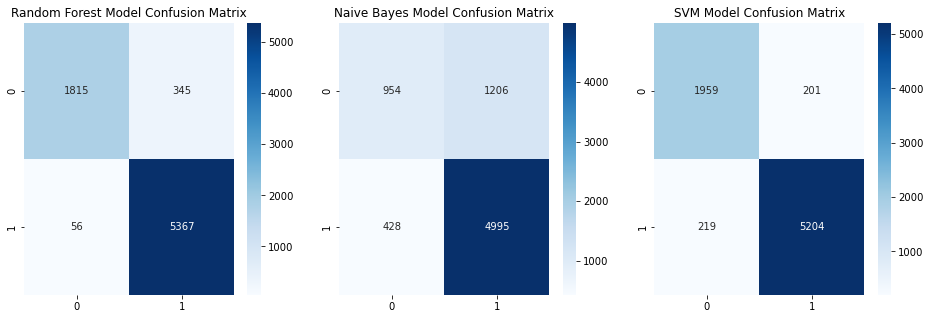

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 5))

# Random Forest Confusion Matrix
sns.heatmap(data=cm_rf, annot=True, fmt=".0f", cmap="Blues", ax=axs[0])
axs[0].set_title("Random Forest Model Confusion Matrix")

# Naive Bayes Confusion Matrix
sns.heatmap(data=cm_nb, annot=True, fmt=".0f", cmap="Blues", ax=axs[1])
axs[1].set_title("Naive Bayes Model Confusion Matrix")

# SVM Confusion Matrix
sns.heatmap(data=cm_svm, annot=True, fmt=".0f", cmap="Blues", ax=axs[2])
axs[2].set_title("SVM Model Confusion Matrix")

plt.show()

In [12]:
data_with_full_text = pd.read_csv('metadata.csv')
# Select the top 10 papers based on title
top_10_papers = data_with_full_text.sort_values('title').head(10)
# Display the top 10 papers
print("Top 10 Papers in Biomedical Text Mining:")
for index, paper in top_10_papers.iterrows():
    print(f"Title: {paper['title']}")
    print(f"Abstract: {paper['abstract']}")
    print(f"Full Text File: {paper['full_text_file']}")
    print("="*50)

Top 10 Papers in Biomedical Text Mining:
Title: "Not safe" is not enough: smokers have a right to know more than there is no safe tobacco product
Abstract: The right to health relevant information derives from the principles of autonomy and self direction and has been recognised in international declarations. Providing accurate health information is part of the basis for obtaining "informed consent" and is a recognised component of business ethics, safety communications, and case and product liability law. Remarkably, anti-tobacco and pro-tobacco sources alike have come to emphasise the message that there is "no safe cigarette" or "no safe tobacco product". We propose that the "no safe" message is so limited in its value that it represents a violation of the right to health relevant information. There is a need to go beyond saying, "there is no safe tobacco product" to indicate information on degree of risks. The "no safe tobacco" message does not contradict, for example, the mistaken 

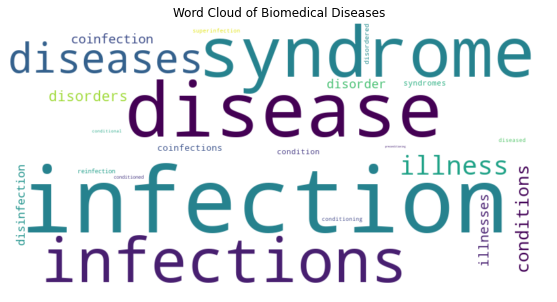

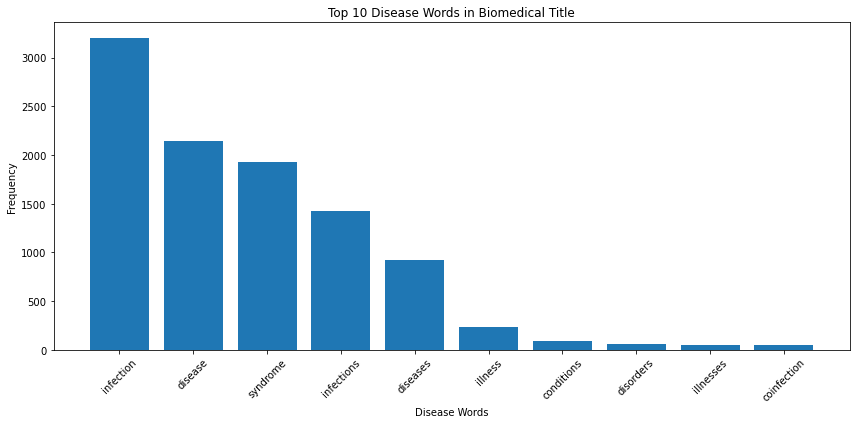

In [13]:
# Preprocess the text and create the word frequency distribution
stop_words = set(stopwords.words('english'))
all_words = []

# Define a function to identify disease-related terms
def is_disease_term(word):
    disease_keywords = ['disease', 'disorder', 'condition', 'syndrome', 'illness', 'infection']
    return any(keyword in word for keyword in disease_keywords)

for text in df['title']:
    text = str(text)  # Convert to string if not already
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)

# Filter disease-related terms
disease_words = [word for word in all_words if is_disease_term(word)]

# Create a Series for disease word counts
disease_word_counts = pd.Series(disease_words).value_counts()

# Plot the word cloud for diseases
disease_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(disease_word_counts)
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.imshow(disease_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Biomedical Diseases')
plt.show()

# Plot the top disease words
top_disease_words = disease_word_counts.nlargest(10)
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(top_disease_words.index, top_disease_words.values)
plt.title('Top 10 Disease Words in Biomedical Title')
plt.xlabel('Disease Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

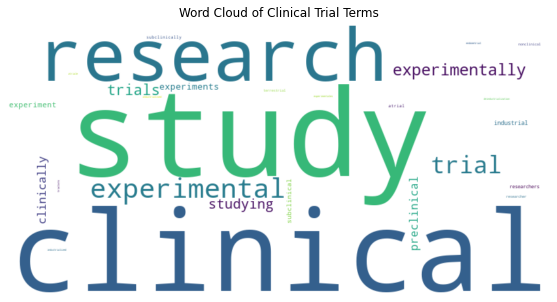

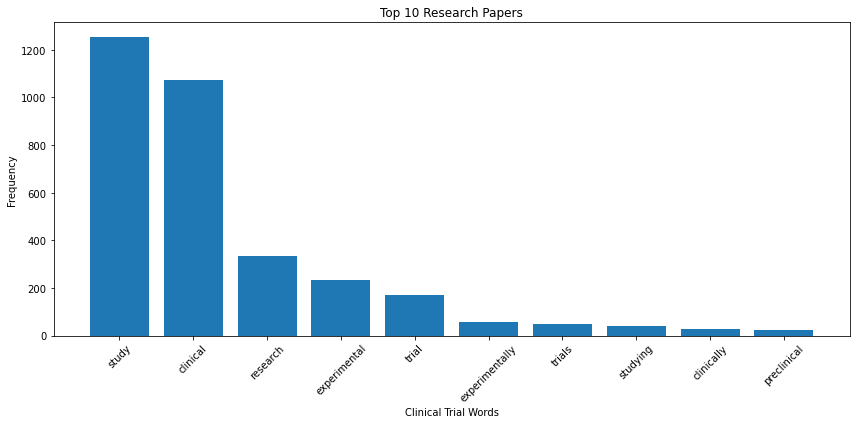

In [14]:

# Preprocess the text and create the word frequency distribution
stop_words = set(stopwords.words('english'))
all_words = []

# Define a function to identify clinical trial-related terms
def is_clinical_trial_term(word):
    clinical_trial_keywords = ['clinical', 'trial', 'study', 'research', 'experiment']
    return any(keyword in word for keyword in clinical_trial_keywords)

for text in df['title']:
    text = str(text)  
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)

# Filter clinical trial-related terms
clinical_trial_words = [word for word in all_words if is_clinical_trial_term(word)]

# Create a Series for clinical trial word counts
clinical_trial_word_counts = pd.Series(clinical_trial_words).value_counts()

# Plot the word cloud for clinical trial terms
clinical_trial_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(clinical_trial_word_counts)
plt.figure(figsize=(10, 5))  
plt.imshow(clinical_trial_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clinical Trial Terms')
plt.show()

# Plot the top clinical trial words
top_clinical_trial_words = clinical_trial_word_counts.nlargest(10)
plt.figure(figsize=(12, 6))  
plt.bar(top_clinical_trial_words.index, top_clinical_trial_words.values)
plt.title('Top 10 Research Papers')
plt.xlabel('Clinical Trial Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

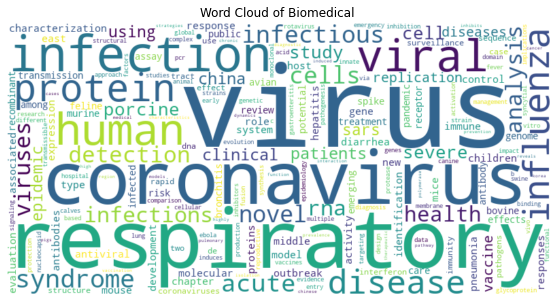

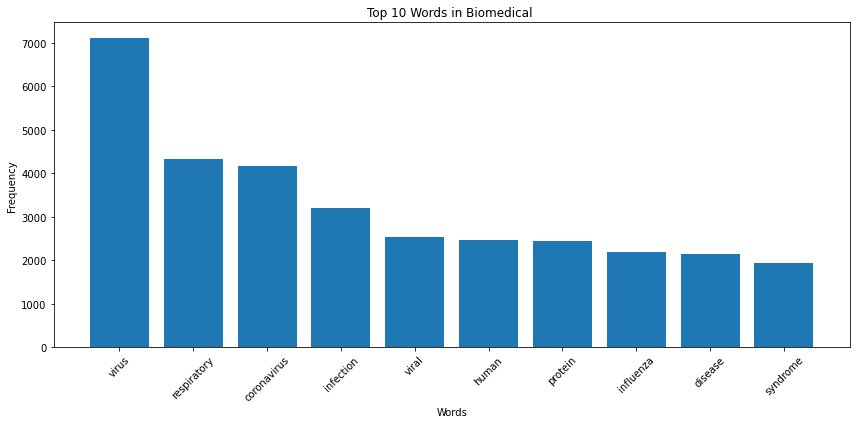

In [15]:

# Preprocess the text and create the word frequency distribution
stop_words = set(stopwords.words('english'))
all_words = []

for text in df['title']:
    text = str(text)  
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)

word_counts = pd.Series(all_words).value_counts()

# Plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Biomedical ')
plt.show()

# Plot the top words
top_words = word_counts.nlargest(10)
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(top_words.index, top_words.values)
plt.title('Top 10 Words in Biomedical ')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [16]:
#answers the 2 research question
# converting abstract into unstructured data.

# Extract the abstracts from the dataset
abstracts = df['abstract']

# Create a list to store the processed data
data = []

# Set a counter to limit the number of processed abstracts
num_abstracts_to_process = 50
processed_abstracts = 0

# Iterate over the abstracts, clean and tokenize them, and remove stopwords
for abstract in abstracts:
    if not isinstance(abstract, str):
        continue
    abstract = abstract.translate(str.maketrans('', '', string.punctuation))
    abstract = abstract.lower()
    sentences = sent_tokenize(abstract)
    words = []
    for sentence in sentences:
        words.extend(word_tokenize(sentence))
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    data.append(' '.join(words))

    processed_abstracts += 1
    if processed_abstracts >= num_abstracts_to_process:
        break
# Finally, it prints the processed abstracts as a list of strings. 
# This code prepares text data for analysis, such as natural language processing or text mining.
# Print the processed abstracts
print(data)

['nextgeneration sequencing increasingly used study samples composed mixtures organisms clinical applications presence pathogen low abundance may highly important present analytical method siann strain identification alignment near neighbors specifically designed rapidly detect set target organisms mixed samples achieves high degree species strainspecificity aligning short sequence reads genomes near neighbor organisms well target empirical benchmarking alongside current stateoftheart methods shows extremely high positive predictive value even low abundances target organism mixed sample siann available illumina basespace app well signature science llc siann results presented streamlined report designed comprehensible nonspecialist user providing powerful tool rapid species detection mixed sample focusing set customizable target organisms near neighbors siann operate quickly low computational requirements delivering highly accurate results', 'emerging disease one infectious epidemic cau

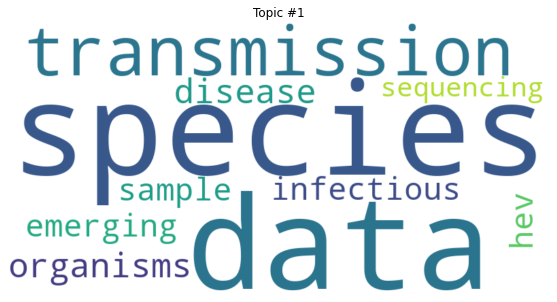

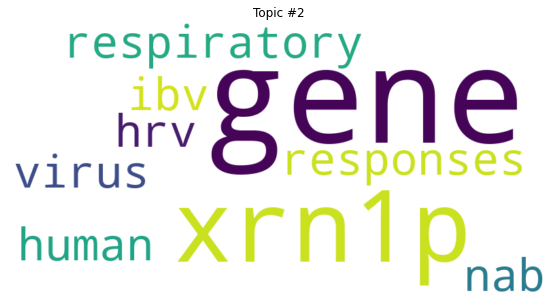

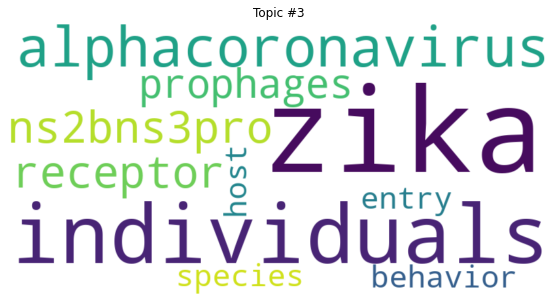

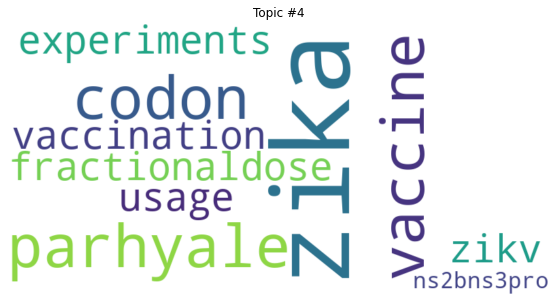

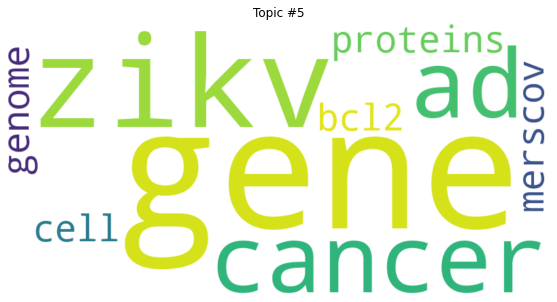

In [22]:
# Convert processed abstracts into a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Perform Latent Dirichlet Allocation (LDA) for text mining
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Visualize topics using word clouds
def plot_word_cloud(lda_model, feature_names, num_topics):
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[:-10-1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic #{topic_idx + 1}")
        plt.axis("off")
        plt.show()

# Visualize topics using word clouds
plot_word_cloud(lda, tfidf_vectorizer.get_feature_names(), 5)

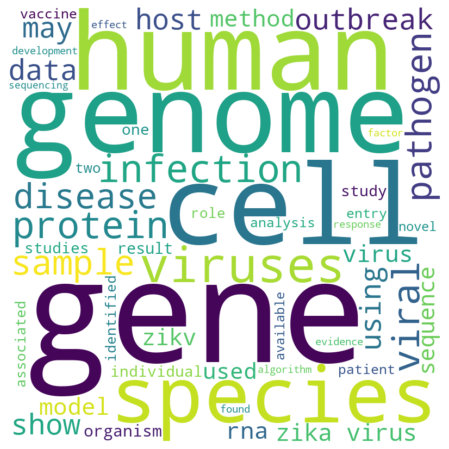

In [18]:

# Concatenate the processed abstracts into a single string
text = ' '.join(data)

# Create a word cloud object and generate the word cloud
wc = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(text)


# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



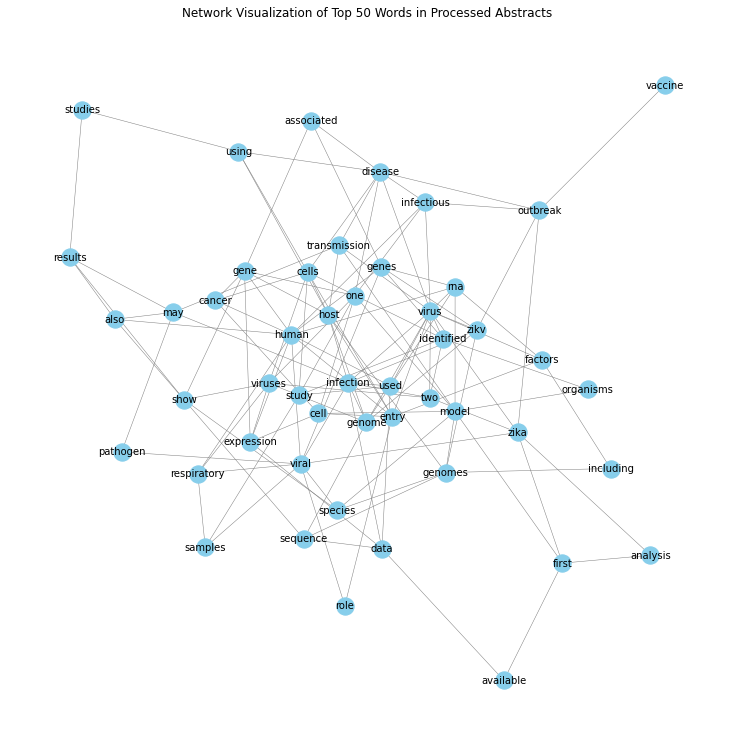

In [19]:
# answers the 3 research question
# This visualization helps identify relationships and patterns among the most frequent words in the abstracts.
# Create a graph object
G = nx.Graph()

# Preprocess the text and create a list of words
stop_words = set(stopwords.words('english'))
all_words = []

for abstract in data:
    tokens = word_tokenize(abstract.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)

# Select the top 50 most frequent words
top_words = word_freq.most_common(50)
top_words = [word for word, _ in top_words]

# Add nodes and edges to the graph
for i in range(len(all_words) - 1):
    word1 = all_words[i]
    word2 = all_words[i + 1]
    if word1 in top_words and word2 in top_words:
        if not G.has_edge(word1, word2):
            G.add_edge(word1, word2)

# Set node positions for better visualization
pos = nx.spring_layout(G, seed=42)
#The spring_layout algorithm is used to position nodes for visualization.
#showing word nodes in sky blue, edges in gray, and labels for each node.
# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray', width=0.5)
plt.title('Network Visualization of Top 50 Words in Processed Abstracts')
plt.show()

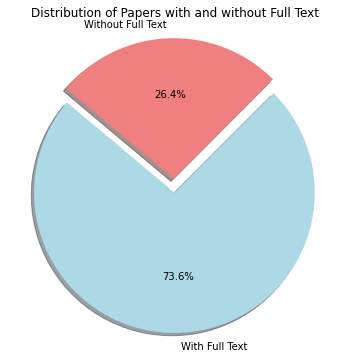

In [20]:

# Calculate the counts of papers with and without full text
papers_with_full_text = df[df['has_full_text'] == True].shape[0]
papers_without_full_text = df[df['has_full_text'] == False].shape[0]

# Create a pie chart
labels = ['With Full Text', 'Without Full Text']
sizes = [papers_with_full_text, papers_without_full_text]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice (With Full Text)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Papers with and without Full Text')
plt.show()






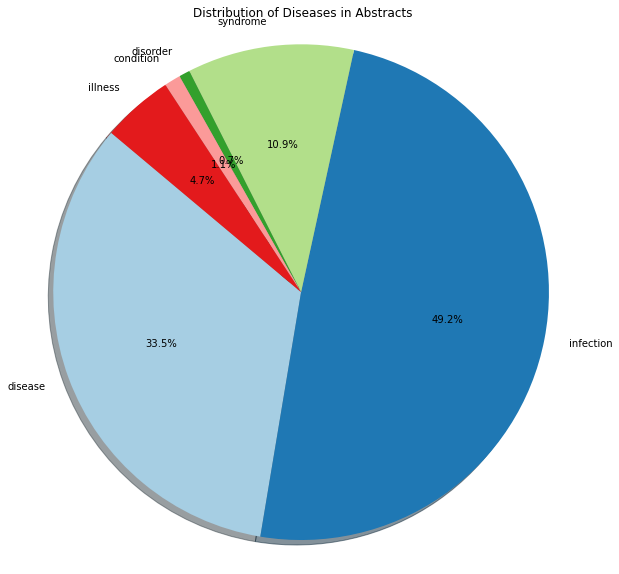

In [21]:

# Extract the abstracts from the dataset
abstracts = df['abstract']

# Set up disease keywords
disease_keywords = ['disease', 'disorder', 'condition', 'syndrome', 'illness', 'infection']

# Initialize a counter to store disease term counts
disease_term_counts = Counter()

# Iterate over abstracts and count disease-related terms
for abstract in abstracts:
    if isinstance(abstract, str):
        tokens = word_tokenize(abstract.lower())
        for token in tokens:
            if token in disease_keywords:
                disease_term_counts[token] += 1

# Create a pie chart
labels = list(disease_term_counts.keys())
sizes = list(disease_term_counts.values())
colors = plt.cm.Paired(range(len(labels)))

plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Diseases in Abstracts')
plt.show()